Fuentes:
kaggle link (https://www.kaggle.com/datasets/uom190346a/ai-powered-job-market-insights)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

AI_job1 = pd.read_csv("ai_job_market_insights.csv")
AI_job2 = pd.read_csv("My_Data.csv")

AI_job2.rename(columns={"Job titiles": "Job_Title"}, inplace = True)

In [2]:
AI_job1["Job_Title"] = AI_job1["Job_Title"].str.lower().str.strip()
AI_job2["Job_Title"] = AI_job2["Job_Title"].str.lower().str.strip()

In [3]:
AI_merged = pd.merge(AI_job1, AI_job2, on="Job_Title", how="inner")
print(AI_merged.head())

              Job_Title       Industry Company_Size       Location  \
0  marketing specialist     Technology        Large      Singapore   
1         sales manager         Retail        Small         Berlin   
2           ux designer      Education        Large  San Francisco   
3            hr manager        Finance       Medium      Singapore   
4         sales manager  Entertainment       Medium      Singapore   

  AI_Adoption_Level Automation_Risk     Required_Skills     Salary_USD  \
0            Medium            High           Marketing   93792.562466   
1               Low            High  Project Management   93027.953758   
2            Medium          Medium       Cybersecurity  102825.007867   
3               Low            High               Sales  102065.720673   
4              High             Low       Cybersecurity   96834.578295   

  Remote_Friendly Job_Growth_Projection AI Impact  Tasks  AI models  \
0              No               Decline       20%    281       

In [4]:
AI_merged.to_csv("merged_ai.csv", index=False)

Limpieza de los 3 Datasets

In [5]:
from Funciones import limpieza_dataset
limpieza_dataset(AI_job1)
limpieza_dataset(AI_job2)
limpieza_dataset(AI_merged)

In [6]:
AI_merged.head(1)

,Job Title,Industry,Company Size,Location,AI Adoption Level,Automation Risk,Required Skills,Salary USD,Remote Friendly,Job Growth Projection,AI Impact,Tasks,AI models,AI Workload Ratio,Domain
0,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.56,No,Decline,20.0,281,2181,0.12884,Leadership & Strategy


Comienza el análisis

In [7]:
#Vamos a utilizar tanto los dos datasets de partida,
#como el data set resultante de su unión para obtener análisis interesantes de este tema.

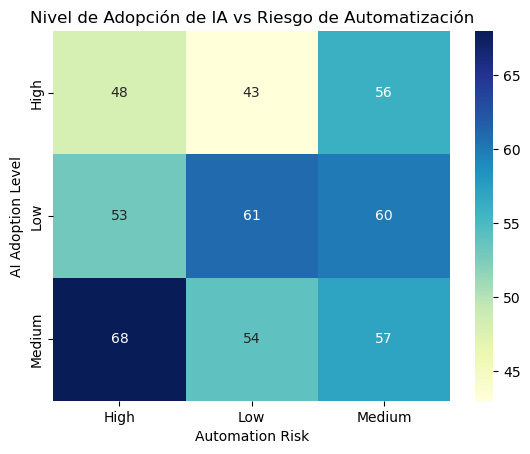

In [8]:
#Relacion entre el nivel de adopción de la IA y el risgo de automatización
pivot_ai_risk = pd.crosstab(AI_job1['AI Adoption Level'], AI_job1['Automation Risk'])
sns.heatmap(pivot_ai_risk, annot=True, cmap="YlGnBu")
plt.title("Nivel de Adopción de IA vs Riesgo de Automatización")
plt.show()


C:\Users\34722\AppData\Local\Temp\ipykernel_27024\3935649892.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_counts.values, y=industry_counts.index, palette="viridis")


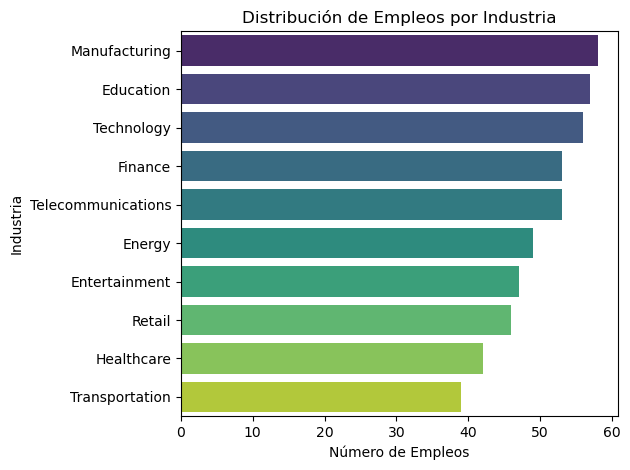

In [9]:
#Distribución de empleos por industria
industry_counts = AI_job1['Industry'].value_counts()
plt.figure()
sns.barplot(x=industry_counts.values, y=industry_counts.index, palette="viridis")
plt.title("Distribución de Empleos por Industria")
plt.xlabel("Número de Empleos")
plt.ylabel("Industria")
plt.tight_layout()
plt.show()

In [10]:
AI_job1.head(1)

,Job Title,Industry,Company Size,Location,AI Adoption Level,Automation Risk,Required Skills,Salary USD,Remote Friendly,Job Growth Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.17,Yes,Growth


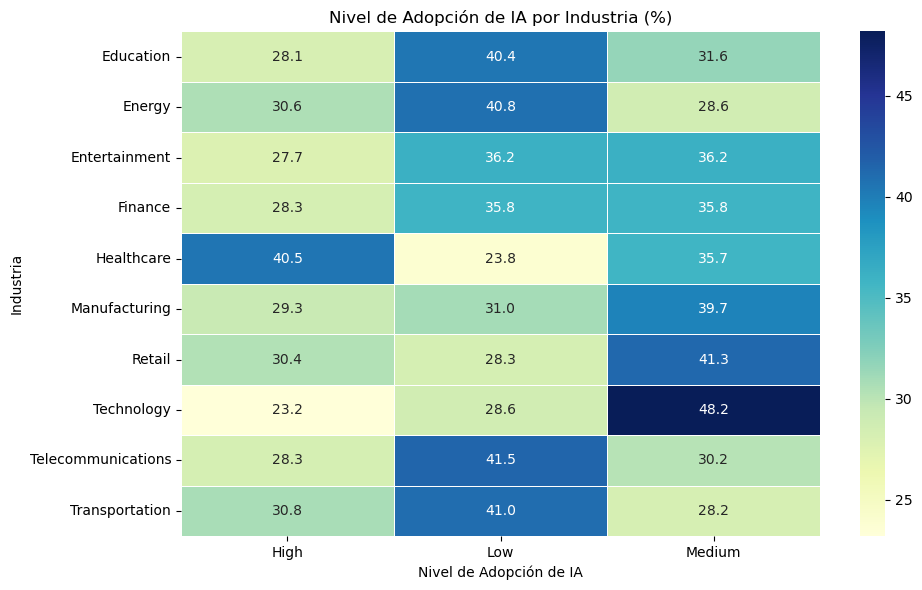

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear tabla de frecuencia cruzada entre Industry y AI_Adoption_Level
industry_adoption = pd.crosstab(AI_job1["Industry"], AI_job1["AI Adoption Level"], normalize='index') * 100
industry_adoption = industry_adoption.round(1)

# Crear gráfico de calor
plt.figure(figsize=(10, 6))
sns.heatmap(industry_adoption, annot=True, cmap="YlGnBu", fmt=".1f", linewidths=0.5)
plt.title("Nivel de Adopción de IA por Industria (%)")
plt.xlabel("Nivel de Adopción de IA")
plt.ylabel("Industria")
plt.tight_layout()
plt.show()

C:\Users\34722\AppData\Local\Temp\ipykernel_27024\3150516831.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_skills, x="Count", y="Skill", palette="mako")


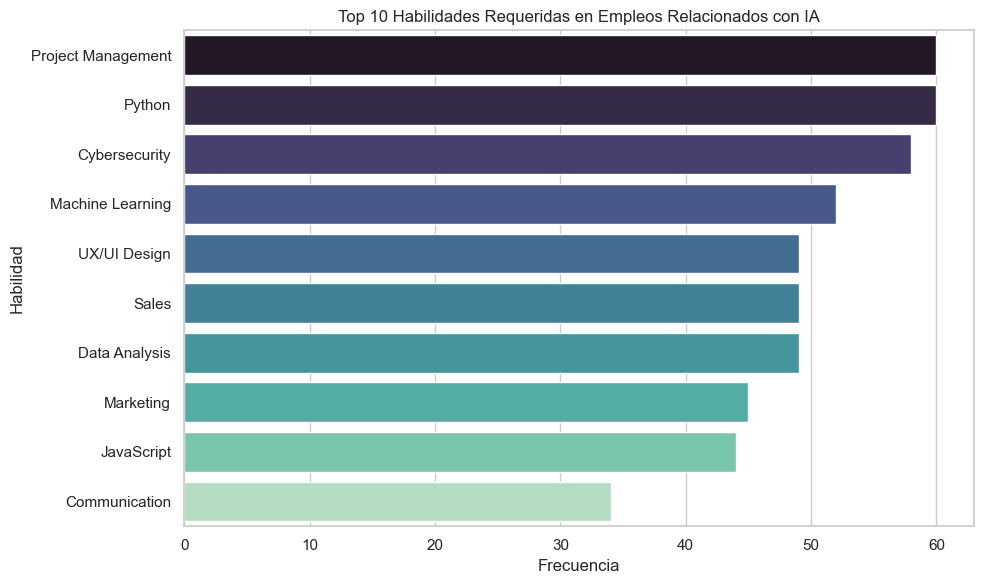

In [12]:
# Contar las 10 habilidades más frecuentes que solicitan las empresas
top_skills = AI_job1["Required Skills"].value_counts().head(10).reset_index()
top_skills.columns = ["Skill", "Count"]


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=top_skills, x="Count", y="Skill", palette="mako")
plt.title("Top 10 Habilidades Requeridas en Empleos Relacionados con IA")
plt.xlabel("Frecuencia")
plt.ylabel("Habilidad")
plt.tight_layout()
plt.show()

In [13]:
#Estadísticas d ela columna Salarios
salary = AI_job1["Salary USD"].describe().round(2).reset_index()
salary.columns = ["Estadística", "Valor"] 
print(salary)

  Estadística      Valor
0       count     500.00
1        mean   91222.39
2         std   20504.29
3         min   31969.53
4         25%   78511.52
5         50%   91998.20
6         75%  103971.28
7         max  155209.82


C:\Users\34722\AppData\Local\Temp\ipykernel_27024\1567796392.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=AI_job1, x="AI Adoption Level", y="Salary USD", palette="mako")


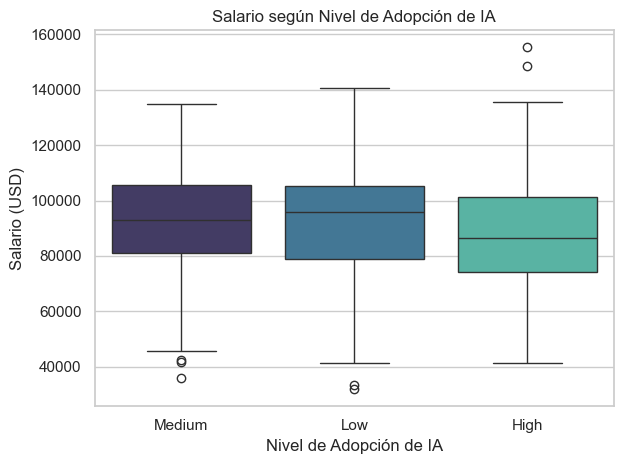

In [14]:
#Compararción de sueldos segun la adopcion de la IA
plt.figure()
sns.boxplot(data=AI_job1, x="AI Adoption Level", y="Salary USD", palette="mako")
plt.title("Salario según Nivel de Adopción de IA")
plt.xlabel("Nivel de Adopción de IA")
plt.ylabel("Salario (USD)")
plt.tight_layout()
plt.show()

C:\Users\34722\AppData\Local\Temp\ipykernel_27024\595770811.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=AI_job1, x="Remote Friendly", y="Salary USD", palette="mako")


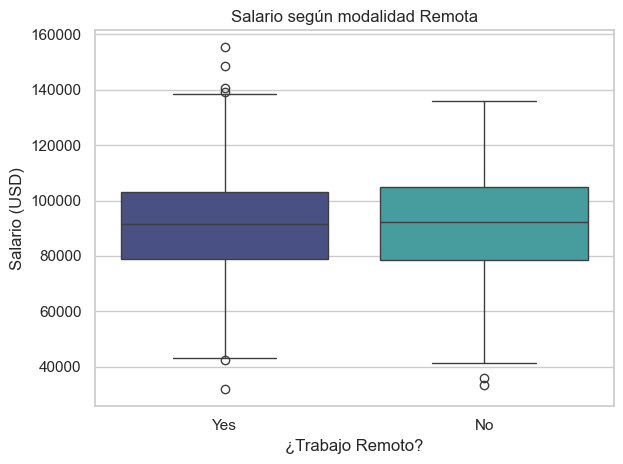

In [15]:
#Influencia del trabajo remoto en el salario
plt.figure()
sns.boxplot(data=AI_job1, x="Remote Friendly", y="Salary USD", palette="mako")
plt.title("Salario según modalidad Remota")
plt.xlabel("¿Trabajo Remoto?")
plt.ylabel("Salario (USD)")
plt.tight_layout()
plt.show()

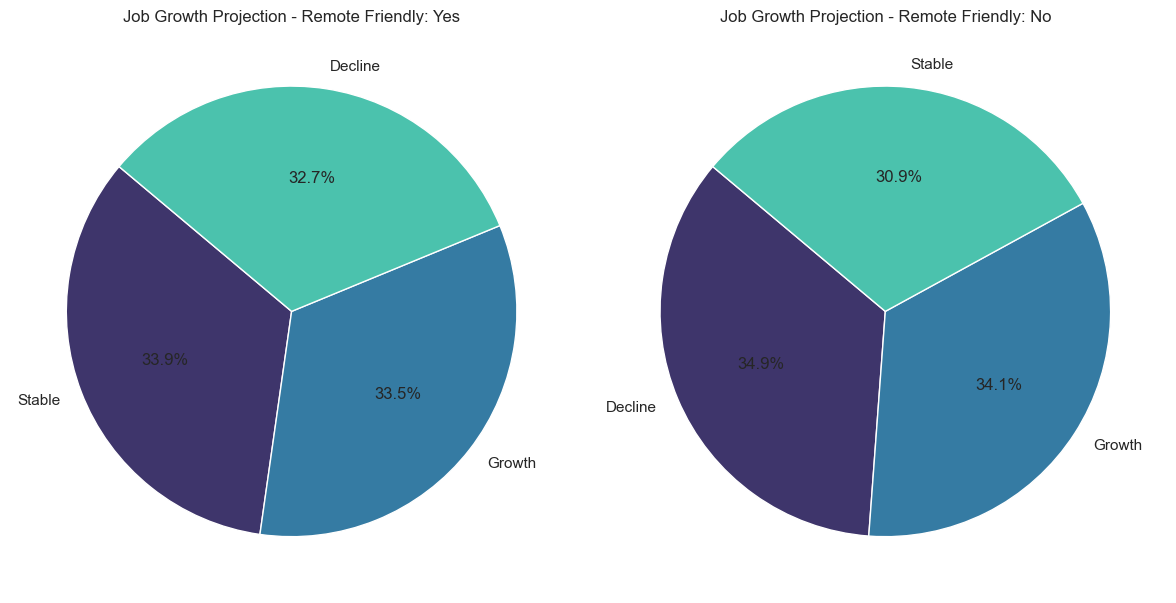

In [16]:
yes_counts = AI_job1[AI_job1['Remote Friendly'] == 'Yes']['Job Growth Projection'].value_counts()
no_counts = AI_job1[AI_job1['Remote Friendly'] == 'No']['Job Growth Projection'].value_counts()

yes_colors = sns.color_palette("mako", n_colors=len(yes_counts))
no_colors = sns.color_palette("mako", n_colors=len(no_counts))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(yes_counts, labels=yes_counts.index, autopct='%1.1f%%', startangle=140, colors=yes_colors)
plt.title('Job Growth Projection - Remote Friendly: Yes')

plt.subplot(1, 2, 2)
plt.pie(no_counts, labels=no_counts.index, autopct='%1.1f%%', startangle=140, colors=no_colors)
plt.title('Job Growth Projection - Remote Friendly: No')

plt.tight_layout()
plt.show()

In [ ]:
#Pasamos a analizar el otro dataset, también por separardo

In [ ]:
#Valores unicos de domain
unique_domains = AI_job2['Domain'].unique()

print("Dominios únicos en el dataset:")
for domain in unique_domains:
    print("-", domain)


Dominios únicos en el dataset:
- Communication & PR
- Data & IT
- Administrative & Clerical
- Leadership & Strategy
- Medical & Healthcare
- Supply Chain & Logistics
- Law Enforcement
- Construction
- Sales & Marketing
- Hospitality


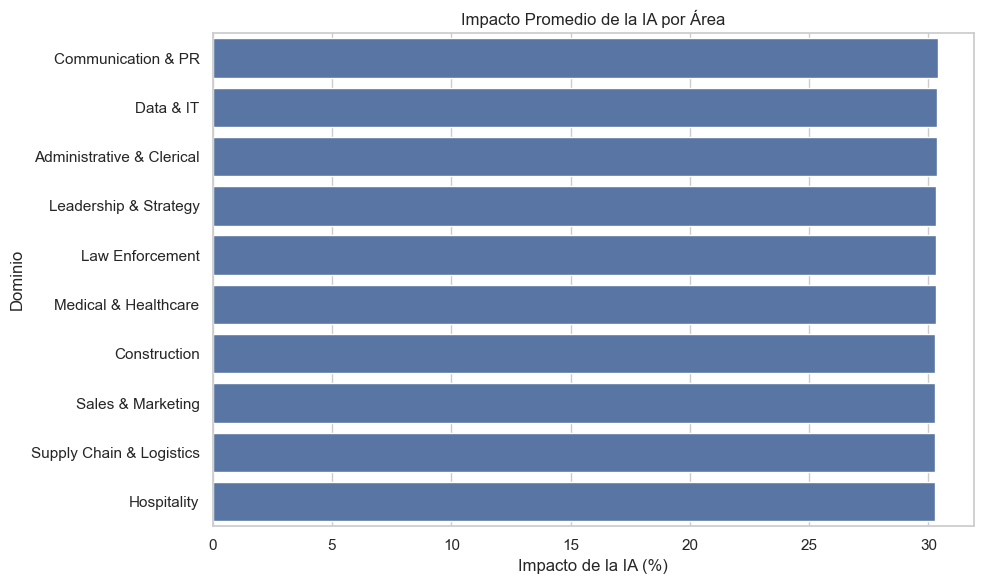

In [ ]:
domain_ai_impact = AI_job2.groupby("Domain")["AI Impact"].mean().sort_values(ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(x=domain_ai_impact.values, y=domain_ai_impact.index)
plt.title("Impacto Promedio de la IA por Área")
plt.xlabel("Impacto de la IA (%)")
plt.ylabel("Dominio")
plt.tight_layout()
plt.show()

C:\Users\34722\AppData\Local\Temp\ipykernel_26104\3560371681.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=AI_job2, x='AI Impact', y='Domain', palette="pastel", inner="quartile")


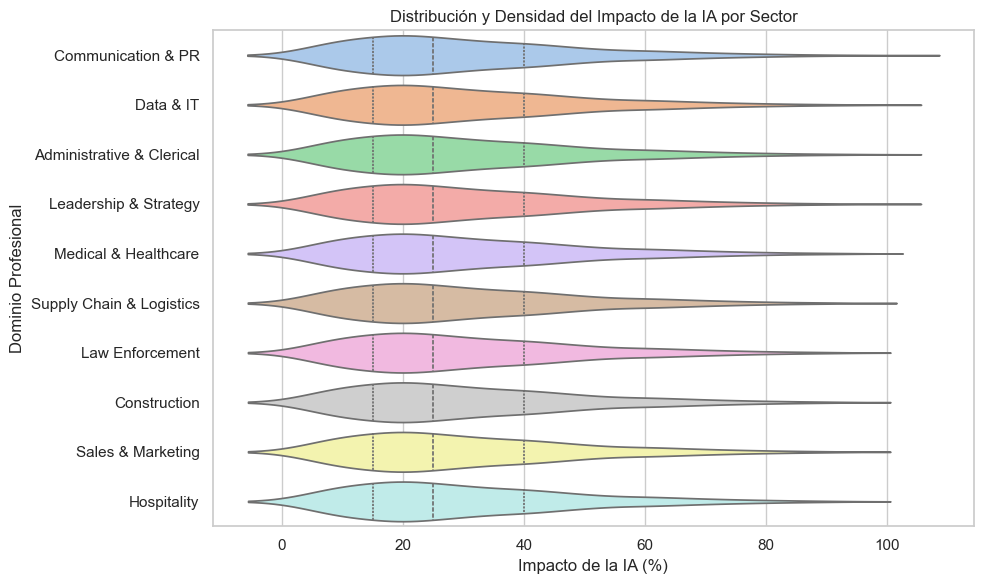

In [ ]:
#Impacto de la IA por sector
plt.figure(figsize=(10,6))
sns.violinplot(data=AI_job2, x='AI Impact', y='Domain', palette="pastel", inner="quartile")
plt.title("Distribución y Densidad del Impacto de la IA por Sector")
plt.xlabel("Impacto de la IA (%)")
plt.ylabel("Dominio Profesional")
plt.tight_layout()
plt.show()

C:\Users\34722\AppData\Local\Temp\ipykernel_26104\3354273606.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=domain_proportions.values, y=domain_proportions.index, palette="viridis")


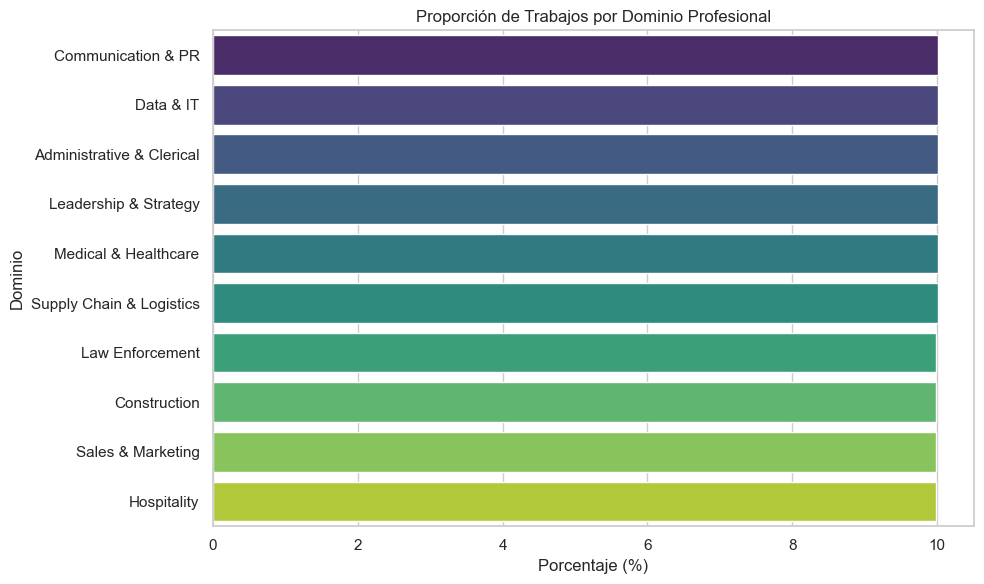

In [ ]:
#Proporción de trabajos por ambito laboral
domain_proportions = AI_job2['Domain'].value_counts(normalize=True).sort_values(ascending=False) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=domain_proportions.values, y=domain_proportions.index, palette="viridis")
plt.title("Proporción de Trabajos por Dominio Profesional")
plt.xlabel("Porcentaje (%)")
plt.ylabel("Dominio")
plt.tight_layout()
plt.show()

In [ ]:
AI_job2.head(1)

,Job Title,AI Impact,Tasks,AI models,AI Workload Ratio,Domain
0,Communications Manager,98.0,365,2546,0.143362,Communication & PR


In [ ]:
#Pasamos al análisis del dataset en el que se mezclan los dos datasts de origen
#Pero antes vamos a crear unas columnas adicionales que nos ayuden a generar un análisis mas completo

In [ ]:
#Combinamos el sector laboral con el riesgo de automatización
AI_merged['Tipo Empresa Riesgo'] = AI_merged['Industry'] + '-' + AI_merged['Automation Risk']
AI_merged.head(1)


,Job Title,Industry,Company Size,Location,AI Adoption Level,Automation Risk,Required Skills,Salary USD,Remote Friendly,Job Growth Projection,AI Impact,Tasks,AI models,AI Workload Ratio,Domain,Tipo Empresa Riesgo
0,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.56,No,Decline,20.0,281,2181,0.12884,Leadership & Strategy,Technology-High


In [ ]:
#Realcionamos el nivel de adopcion de la IA segun la localización

In [ ]:
AI_merged['Region IA'] = AI_merged['Location'] + '-' + AI_merged['AI Adoption Level']
AI_merged.head(1)

,Job Title,Industry,Company Size,Location,AI Adoption Level,Automation Risk,Required Skills,Salary USD,Remote Friendly,Job Growth Projection,AI Impact,Tasks,AI models,AI Workload Ratio,Domain,Tipo Empresa Riesgo,Region IA
0,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.56,No,Decline,20.0,281,2181,0.12884,Leadership & Strategy,Technology-High,Singapore-Medium


In [ ]:
#Empezamos el análisis

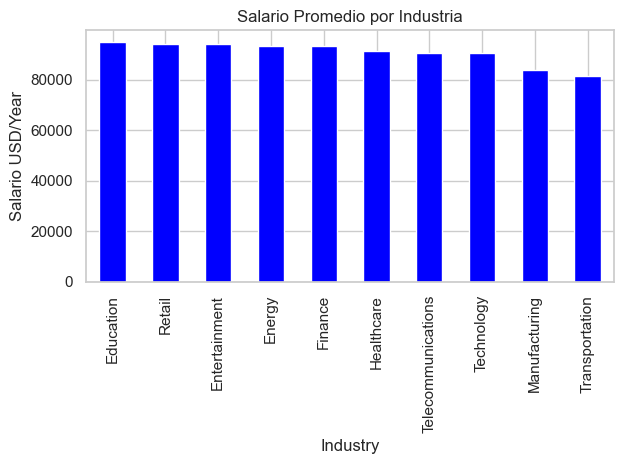

In [ ]:
#Salario promedio por industria
industry_group = AI_merged.groupby("Industry")[["Salary USD", "AI Workload Ratio"]].mean().sort_values(by="Salary USD", ascending=False)

industry_group[["Salary USD"]].plot(kind='bar', color="blue", legend=False)
plt.title("Salario Promedio por Industria")
plt.ylabel("Salario USD/Year")
plt.tight_layout()
plt.show()

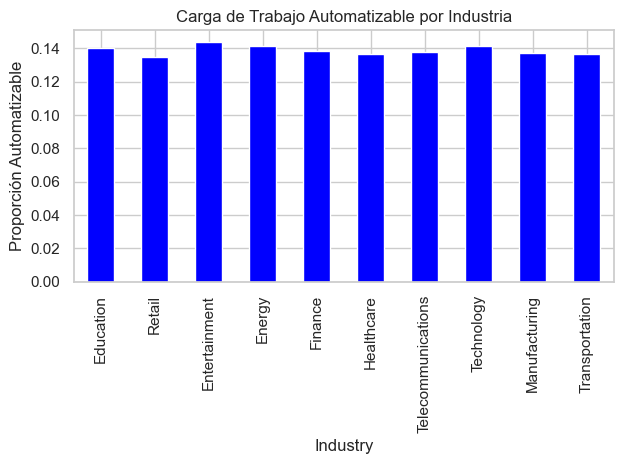

In [ ]:
#Carga de trabajo automatizable por industria
industry_group[["AI Workload Ratio"]].plot(kind='bar', color='blue', legend=False)
plt.title("Carga de Trabajo Automatizable por Industria")
plt.ylabel("Proporción Automatizable")
plt.tight_layout()
plt.show()


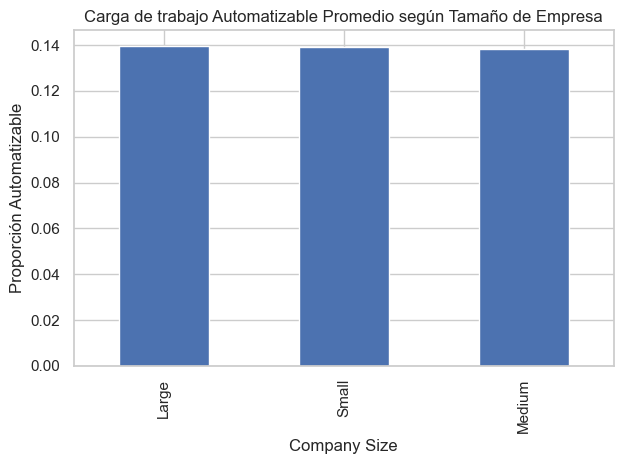

In [ ]:
company_group = AI_merged.groupby("Company Size").agg({
    "Tasks": "mean",
    "AI models": "mean",
    "AI Workload Ratio": "mean",
    "Salary USD": "mean"
}).sort_values(by="AI Workload Ratio", ascending=False)

company_group[["AI Workload Ratio"]].plot(kind='bar', legend=False)
plt.title("Carga de trabajo Automatizable Promedio según Tamaño de Empresa")
plt.ylabel("Proporción Automatizable")
plt.tight_layout()
plt.show()

In [ ]:
#Aqui vemos que está muy equilibrado el gráfico,
#y que afecta por igual a todos los tamaños de empresa el impacto de la IA

In [ ]:
#Vamos a intentar crear alguna columna a partir de la api de adzuna
#ID = aeb4aaf3
#Key= 146fd9ef43c92e7b8726c7c6ca501bd5

In [ ]:
import requests
import time
import numpy as np

APP_ID = "aeb4aaf3"
APP_KEY = "146fd9ef43c92e7b8726c7c6ca501bd5"

def obtener_ofertas_adzuna(job_title, location=""):
    url = "https://api.adzuna.com/v1/api/jobs/us/search/1"
    params = {
        "app_id": APP_ID,
        "app_key": APP_KEY,
        "what": job_title,
        "results_per_page": 1,
        "content-type": "application/json"
    }
    if location:
        params["where"] = location

    try:
        response = requests.get(url, params=params)
        if response.status_code == 200:
            data = response.json()
            return data.get("count", 0)
        else:
            print(f"❌ Error en '{job_title}': {response.status_code}")
            return None
    except Exception as e:
        print(f"❌ Fallo con '{job_title}': {e}")
        return None

unique_jobs = AI_merged['Job Title'].unique()[:10] 
oferta_dict = {}

print("🔍 Consultando API de Adzuna...")

for job in unique_jobs:
    print(f"→ Consultando: {job}")
    oferta_dict[job] = obtener_ofertas_adzuna(job)
    time.sleep(1) 


AI_merged["Available Job Offers"] = AI_merged["Job Title"].map(oferta_dict)


🔍 Consultando API de Adzuna...
→ Consultando: Marketing Specialist
→ Consultando: Sales Manager
→ Consultando: Ux Designer
→ Consultando: Hr Manager
→ Consultando: Product Manager
→ Consultando: Software Engineer
→ Consultando: Data Scientist
→ Consultando: Operations Manager


In [ ]:
AI_merged.head(12)

,Job Title,Industry,Company Size,Location,AI Adoption Level,Automation Risk,Required Skills,Salary USD,Remote Friendly,Job Growth Projection,AI Impact,Tasks,AI models,AI Workload Ratio,Domain,Tipo Empresa Riesgo,Region IA,Available Job Offers
0,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.56,No,Decline,20.0,281,2181,0.128840,Leadership & Strategy,Technology-High,Singapore-Medium,13516
1,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.95,No,Growth,23.0,293,1997,0.146720,Hospitality,Retail-High,Berlin-Low,302745
2,Ux Designer,Education,Large,San Francisco,Medium,Medium,Cybersecurity,102825.01,No,Growth,50.0,129,993,0.129909,Communication & PR,Education-Medium,San Francisco-Medium,22383
3,Hr Manager,Finance,Medium,Singapore,Low,High,Sales,102065.72,Yes,Growth,20.0,299,1960,0.152551,Leadership & Strategy,Finance-High,Singapore-Low,28698
4,Sales Manager,Entertainment,Medium,Singapore,High,Low,Cybersecurity,96834.58,Yes,Decline,23.0,293,1997,0.146720,Hospitality,Entertainment-Low,Singapore-High,302745
5,Marketing Specialist,Finance,Small,London,High,High,Python,91566.97,Yes,Growth,20.0,281,2181,0.128840,Leadership & Strategy,Finance-High,London-High,13516
6,Hr Manager,Retail,Small,Paris,Low,High,Cybersecurity,98209.52,Yes,Decline,20.0,299,1960,0.152551,Leadership & Strategy,Retail-High,Paris-Low,28698
7,Product Manager,Finance,Medium,Singapore,High,High,JavaScript,101001.90,Yes,Growth,60.0,195,1732,0.112587,Supply Chain & Logistics,Finance-High,Singapore-High,227651
8,Sales Manager,Telecommunications,Small,Dubai,High,Low,UX/UI Design,82799.36,No,Growth,23.0,293,1997,0.146720,Hospitality,Telecommunications-Low,Dubai-High,302745
9,Software Engineer,Manufacturing,Medium,Singapore,High,Medium,Machine Learning,78401.26,No,Decline,60.0,133,1342,0.099106,Communication & PR,Manufacturing-Medium,Singapore-High,116671


C:\Users\34722\AppData\Local\Temp\ipykernel_26104\2243206897.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_demanded_jobs, x="Available Job Offers", y="Job Title", palette="mako")


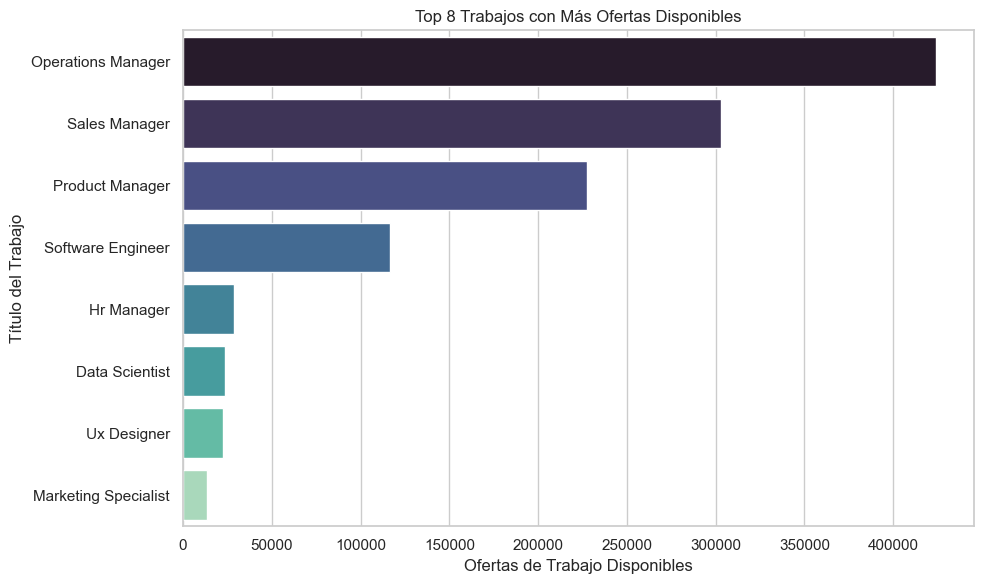

In [ ]:
#obtenemos los 10 trabajos mas demandados
top_demanded_jobs = (
    AI_merged.groupby("Job Title")["Available Job Offers"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Crear gráfico de barras
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=top_demanded_jobs, x="Available Job Offers", y="Job Title", palette="mako")
plt.title("Top 8 Trabajos con Más Ofertas Disponibles")
plt.xlabel("Ofertas de Trabajo Disponibles")
plt.ylabel("Título del Trabajo")
plt.tight_layout()
plt.show()

C:\Users\34722\AppData\Local\Temp\ipykernel_26104\3575422801.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_demanded_jobs, x="AI models", y="Industry", palette="mako")


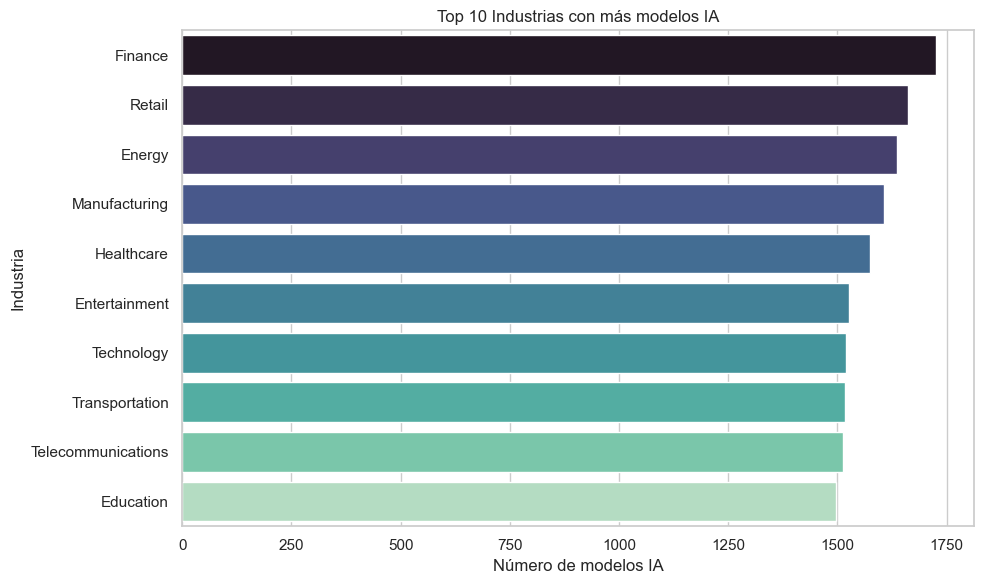

In [ ]:
#Industrias con mas modelos de IA
top_demanded_jobs = (
    AI_merged.groupby("Industry")["AI models"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=top_demanded_jobs, x="AI models", y="Industry", palette="mako")
plt.title("Top 10 Industrias con más modelos IA")
plt.xlabel("Número de modelos IA")
plt.ylabel("Industria")
plt.tight_layout()
plt.show()

C:\Users\34722\AppData\Local\Temp\ipykernel_26104\1387573862.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remote_jobs["Salary USD"] = pd.to_numeric(remote_jobs["Salary USD"], errors='coerce')
C:\Users\34722\AppData\Local\Temp\ipykernel_26104\1387573862.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_remote_jobs, x="Salary USD", y="Job Title", palette="mako")


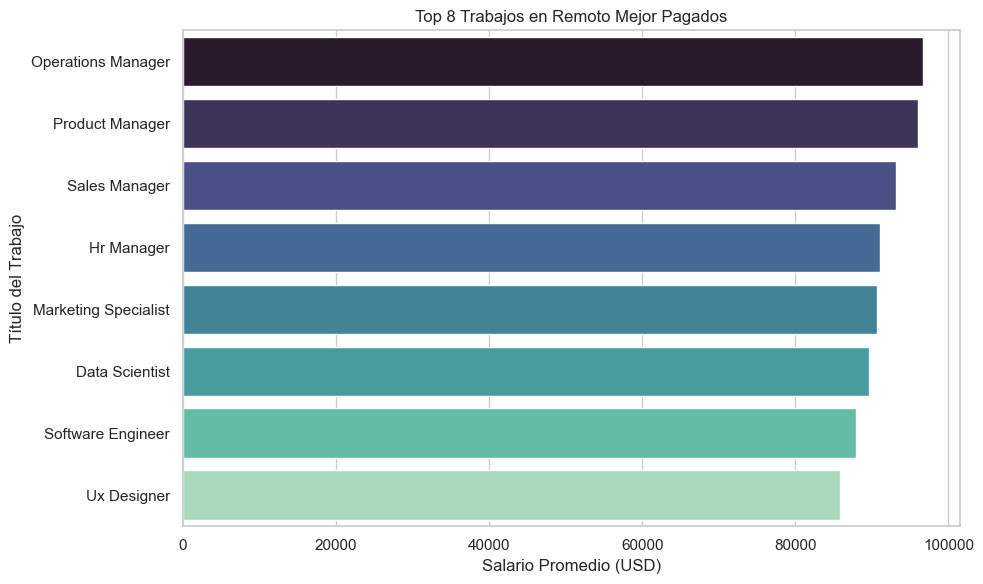

In [ ]:
#Trabajos en remoto mejor pagados

remote_jobs = AI_merged[AI_merged["Remote Friendly"] == "Yes"]

remote_jobs["Salary USD"] = pd.to_numeric(remote_jobs["Salary USD"], errors='coerce')

top_remote_jobs = (
    remote_jobs.groupby("Job Title")["Salary USD"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=top_remote_jobs, x="Salary USD", y="Job Title", palette="mako")
plt.title("Top 8 Trabajos en Remoto Mejor Pagados")
plt.xlabel("Salario Promedio (USD)")
plt.ylabel("Título del Trabajo")
plt.tight_layout()
plt.show()